<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Datasets y Dataloaders: MNIST</center></span>

<figure>
<center>
<img src="../Imagenes/Data_ST.jpg" width="400" height="400" align="center"/>
</center>
</figure>


Fuente: <a href="https://commons.wikimedia.org/wiki/File:Data_ST.jpg">Glenn_Cote_Brent_Spiner.jpg: Grcotederivative work: El Carlos</a>, <a href="http://www.gnu.org/copyleft/fdl.html">GFDL</a>, via Wikimedia Commons<a 

## <span style="color:#4361EE">Coordinador</span>

- Campo Elías Pardo, PhD, cepardot@unal.edu.co

## <span style="color:#4361EE">Profesores</span>

1. Alvaro  Montenegro, PhD, ammontenegrod@unal.edu.co
1. Camilo José Torres Jiménez, Msc, cjtorresj@unal.edu.co
1. Daniel  Montenegro, Msc, dextronomo@gmail.com 

## <span style="color:#4361EE">Asesora Medios y Marketing digital</span>

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com
1. Jessica López Mejía, jelopezme@unal.edu.co
1. Venus Celeste Puertas Gualtero, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Jefe Jurídica</span>

6. Paula Andrea Guzmán, guzmancruz.paula@gmail.com

## <span style="color:#4361EE">Coordinador Jurídico</span>

7. David Fuentes, fuentesd065@gmail.com

## <span style="color:#4361EE">Desarrolladores Principales</span>

8. Dairo Moreno, damoralesj@unal.edu.co
9. Joan Castro, jocastroc@unal.edu.co
10. Bryan Riveros, briveros@unal.edu.co
11. Rosmer Vargas, rovargasc@unal.edu.co
12. Venus Puertas, vpuertasg@unal.edu.co

## <span style="color:#4361EE">Expertos en Bases de Datos</span>

13. Giovvani Barrera, udgiovanni@gmail.com
14. Camilo Chitivo, cchitivo@unal.edu.co

## <span style="color:blue">Referencias</span>

1. [Alvaro Montenegro y Daniel Montenegro, Inteligencia Artificial y Aprendizaje Profundo, 2023](https://github.com/AprendizajeProfundo/Diplomado)
1. [Alvaro Montenegro, Daniel Montenegro y Oleg Jarma,  Inteligencia Artificial y Aprendizaje Profundo Avanzado, 2023](https://github.com/AprendizajeProfundo/Diplomado-Avanzado)
1. [Tutoriales de Pytorch](https://pytorch.org/tutorials/)
1. [Pytorchlightning.ai](https://www.pytorchlightning.ai/)

## <span style="color:blue">Contenido</span>

* [Introducción](#Introducción)
* [Ejemplo FashionMnist](#Ejemplo-FashionMnist)


## <span style="color:blue">Introducción</span>

El código para procesar muestras de datos puede resultar complicado y difícil de mantener; idealmente queremos que nuestro código de datasets se desacople de nuestro código de entrenamiento modelo para una mejor legibilidad y modularidad. PyTorch proporciona dos primitivas de datos: `torch.utils.data.DataLoader` y `torch.utils.data.Dataset` que le permiten utilizar conjuntos de datos precargados, así como sus propios datos. 

`Dataset` almacena las muestras y sus etiquetas correspondientes, y `DataLoader` envuelve un iterable alrededor del conjunto de datos para permitir un fácil acceso a las muestras.

Las librerías especializadas de Pytorch como Torchvision, Torchtext, Torchaudio tienen conjuntos de datos disponibles para ser cargados directamente como Datasets. Revisemos primero el ejemplo de  FashionMNIST. Luego trabajaremos con los datos originales MNIST.

## <span style="color:blue">Ejemplo FashionMnist</span>

In [6]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### <span style="color:#4CC9F0">Iterando y visualizando el dataset</span>

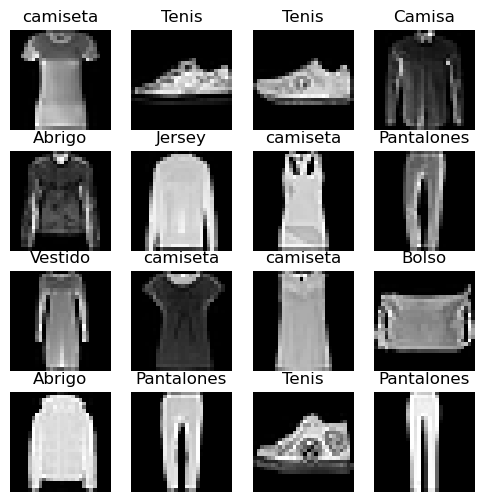

In [5]:
label_map = {
    0: 'camiseta',
    1: "Pantalones",
    2: "Jersey",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Tenis",
    8: "Bolso",
    9: "Botines",
}
figure = plt.figure(figsize=(6,6))
cols, rows = 4,4
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size =(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [5]:
img.shape

torch.Size([1, 28, 28])

## <span style="color:blue">Ejemplo MNIST</span>

### <span style="color:#4CC9F0">Creación de un conjunto de datos personalizado para sus archivos</span>

En este ejemplo, las imágenes MNIST se almacenan en un directorio img_dir, y sus etiquetas se almacenan por separado en un archivo CSV  `annotations_file`.


Los datos fueron bajados desde la fuente usando wget. Por favor revise los detalles.

Si desea ejecutar este código, 
- Vaya a la consola,
- ubíquese en el directorio (carpeta) en donde desea bajar los datos y
- ejecute cada orden wget

Luego de esto ya tiene los datos comprimidos en su carpeta

En este ejemplo hemos dejado los datos en la rura relativa

+ "../Datos/MNIST"

In [ ]:
#!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
#!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

De acuerdo con la documentación los datos estan en formato binario y los primero 16 bytes son de documentación. Esto explica porque leeremos los datos de la fuente como sigue.

#### <span style="color:#4CC9F0">Lectura imágenes de entrenamiento</span>

Investigue cualquier línea de código que no entienda. El objeto `gzip` permite leer los datos desde un archivo comprimido.

In [1]:
import gzip

directorio = '../Datos/MNIST/'
file_im3 = 'train-images-idx3-ubyte.gz'
path = directorio + file_im3
f = gzip.open(path,'r')

# cada imagen tiene tamaño 28*28 pixeles
image_size = 28
num_images = 60000

import numpy as np
# omite los primeros 16 bytes
f.read(16) 
# cada pixel en 1 byte = 8 bits
# lee todos los datos y los coloca en un buffer de memoria
buf = f.read(image_size * image_size * num_images) 
# traslada los datos aun una darray de numpy de tipo float32
data_train = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# Cambia la forma de los datos par entregarlos listos la datset
data_train = data_train.reshape(num_images, image_size, image_size, 1)
print(data_train.shape)

(60000, 28, 28, 1)


#### <span style="color:#4CC9F0">Lectura etiquetas de entrenamiento</span> 

En este caso solamente hay 8 bytes que debemos omitir

In [2]:
import gzip

file_l3 = 'train-labels-idx1-ubyte.gz'
path = directorio + file_l3
f = gzip.open(path,'r')

num_labels = 60000

import numpy as np
f.read(8) # omite los primeros 8 bytes
buf = f.read(num_labels)
label_train = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(label_train.shape)
print(label_train[:20])

(60000,)
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


#### <span style="color:#4CC9F0">Lectura imágenes de prueba</span>

In [3]:
import gzip

file_im10 = 't10k-images-idx3-ubyte.gz'
path = directorio + file_im10
f = gzip.open(path,'r')

image_size = 28
num_images = 10000

import numpy as np
f.read(16) # omite los primeros 16 bytes
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size, 1)
print(data_test.shape)

(10000, 28, 28, 1)


#### <span style="color:#4CC9F0">Lectura etiquetas de prueba</span> 

In [4]:
import gzip

file_l10 = 't10k-labels-idx1-ubyte.gz'
path = directorio + file_l10
f = gzip.open(path,'r')

num_labels = 10000

import numpy as np
f.read(8) # omite los primeros 8 bytes
buf = f.read(num_labels)
label_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(label_test.shape)
print(label_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


#### <span style="color:#4CC9F0">Crea datasets para estos datos</span> 

In [7]:

class ImageDataset(Dataset):
    def __init__(self, labels, images, transform=None, target_transform=None):
        self.labels = labels
        self.images = images
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.images[idx]
        label =  self.labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

In [8]:
train_dataset = ImageDataset(label_train, data_train)
test_dataset = ImageDataset(label_test, data_test)

#### <span style="color:#4CC9F0">Versión modificada para datos en texto e imágenes</span> 

La siguinte clase implementa el caso en que las etiquetas están un archivo de tipo csv y la iámgenes están formato gráfico como `png`. Tenemos una ruta para las etiwquetas y otra para las imágenes.

En el ejemplo, las etiquetas se leeran ee un dataframe de Pandas. Se supone que el archivo tiene dos columnas: la columna 0 contiene el nombre del archivo de la imagen y la columna 1, la respectiva etiqueta.

Es decir, las etiquetas (labels) del archivo en el ejemplo *labels.csv*  lucen como

* tshirt1.jpg, 0
* tshirt2.jpg, 0
* ......
* ankleboot999.jpg, 9

In [4]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotation_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
    
    def __len__(self):
        return len(self.img_labels)
    
    def __get_item__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label =  self.image_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

### <span style="color:#4CC9F0">Preparando sus datos para entrenamiento con DataLoaders</span>

In [9]:
from torch.utils.data import DataLoader

num_workers = torch.get_num_threads()//2

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, 
                               num_workers= num_workers)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

torch.get_num_threads()

2

In [10]:
len(next(iter(test_dataloader)))

2

### <span style="color:#4CC9F0">Iterando a lo largo del DataLoader</span>

Cada iteración retorna un batch (`batch_size=64`) de datos (`train_features` y `train_labels`). Dado que *shuffel=True* en el ejemplo, todos los lotes de datos se mezclan. Un control más fino para establecer el orden se obtiene usando `Samplers`.

Shape del lote de imágenes: torch.Size([64, 28, 28, 1])
Shape del lote de etiquetas: torch.Size([64])


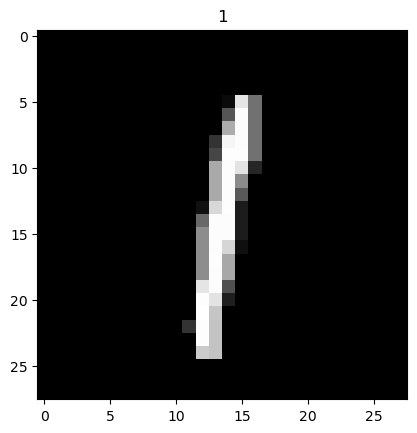

In [11]:
# Despliega imagen y etiqueta
train_features, train_labels = next(iter(train_dataloader))
print(f'Shape del lote de imágenes: {train_features.size()}')
print(f'Shape del lote de etiquetas: {train_labels.size()}')
img = train_features[0].squeeze()# primer elemento del batch 
# squeeze elimina ejes de tamaño 1.
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.title(label.numpy())
plt.show()


#### <span style="color:#4CC9F0">Un iterador de visualización</span> 

In [12]:
label_map = {
    0: 'camiseta',
    1: "Pantalones",
    2: "Jersey",
    3: "Vestido",
    4: "Abrigo",
    5: "Sandalia",
    6: "Camisa",
    7: "Tenis",
    8: "Bolso",
    9: "Botines",
}


class Draw:
    def __init__(self, label_map, images_iterator, cols=4, rows=4, figsize=(6,6)):
        self.data = images_iterator
        self.label_map = label_map
        self.figsize=figsize
        self.cols = cols
        self.rows = rows
        self.index = 0      

    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration

        self.index += 1  
        
        img, label = next(self.data)
        figure = plt.figure(figsize=self.figsize)
        for i in range(1, self.cols*self.rows+1):
            #sample_idx = torch.randint(len(training_data), size =(1,)).item()
            #img, label = training_data[sample_idx]
            figure.add_subplot(self.rows, self.cols, i)
            #plt.title(self.label_map[label])
            plt.axis('off')
            plt.imshow(img[i].squeeze(), cmap='gray')
            plt.title(label[i].numpy())
        plt.show()
        #return value

In [13]:
images = Draw(label_map, iter(train_dataloader))

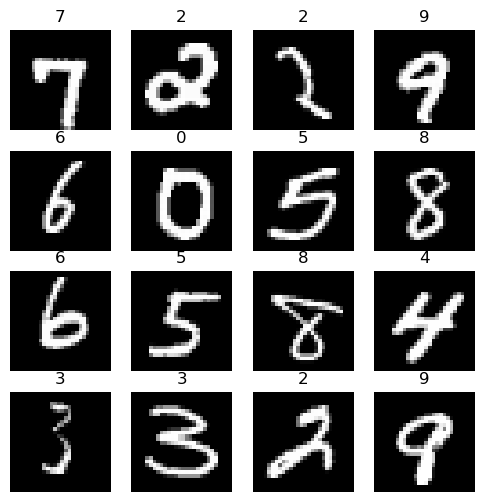

In [14]:
next(images)

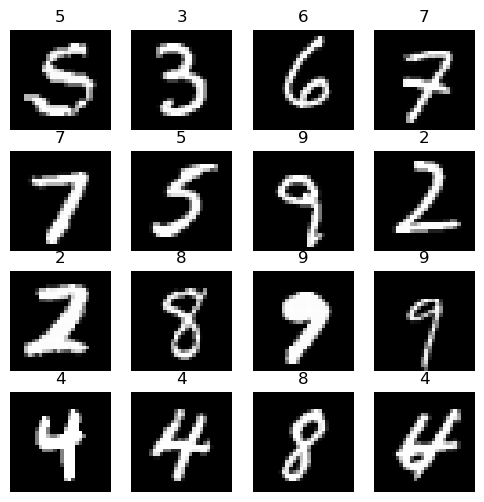

In [15]:
next(images)